# Stability
Note: Running Python 3.6.6

In [1]:
import numpy as np
import scipy
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

## Obtain low-pass filter coefficients for a difference equation (DE)

In [2]:
b,a = signal.butter(2,0.5)
print(a)
print(b)

[ 1.00000000e+00 -1.66533454e-16  1.71572875e-01]
[0.29289322 0.58578644 0.29289322]


In [3]:
# signal.butter gives filter coefficients for a butterworth filter
# the first parameter tells us how many coefficients to return
# the second tells us how much of the signal to keep

### Z-plane zero-pole plot of the transfer function $ H(z) = B(z) / A(z)$

In [4]:
def zplane(b,a):
    # First, retrieve the poles and zeros
    z,p,k = signal.tf2zpk(b,a)
    # Plot the unit circle 
    circle = plt.Circle((0,0),1,linestyle='--',fill=False)
    fig,ax = plt.subplots(figsize=(8,8))

    ax.add_artist(circle)
    plt.grid(axis='both',which='both')
    plt.xlim((-1.5,1.5))
    plt.ylim((-1.5,1.5))

    # Plot zeros
    plt.plot(np.real(z),np.imag(z),'o',markersize=12,fillstyle='none')
    plt.plot(np.real(p),np.imag(p),'x',markersize=12)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Pole-zero plot')

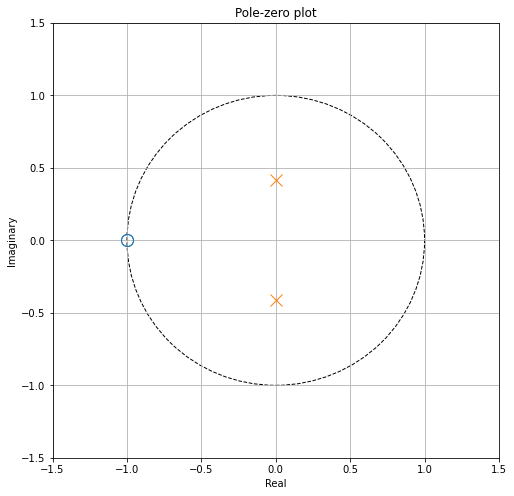

In [5]:
zplane(b,a)

### Impulse response $h[n]$ of the transfer function $H(z) = B(z) / A(z)$

In [6]:
def impz(b,a,N=50):
    n = np.arange(N)
    x = signal.unit_impulse(N,0)
    h = signal.lfilter(b,a,x)
    plt.stem(n,h)
    plt.title('Impulse response')
    plt.xlabel('n')
    plt.ylabel('h[n]')

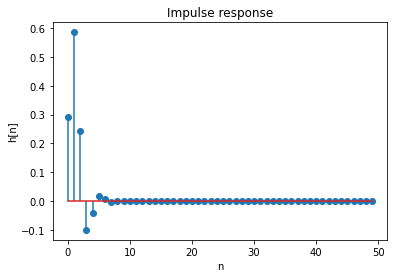

In [7]:
impz(b,a,50)

## Load a test signal

In [8]:
from scipy.io.wavfile import read
from IPython.display import Audio
fs,x = read('handel.wav')

<StemContainer object of 3 artists>

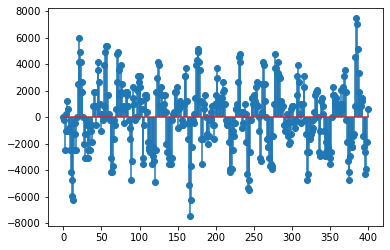

In [9]:
plt.stem(x[:400])

In [10]:
Audio(data=x, rate=fs)

### Apply the DE specified by $b$ and $a$ to an input signal $x$ to get $y$

In [11]:
y = signal.lfilter(b,a,x)

### Checking output is bounded

In [12]:
Audio(data=y, rate=fs)

### Slightly change $A(z)$ to $A_1(z)$

In [13]:
a1 = np.copy(a)
a1[2] = 1.1
print("a = ", a)
print("a1 = ", a1)
print("a - a1 =", a - a1)

a =  [ 1.00000000e+00 -1.66533454e-16  1.71572875e-01]
a1 =  [ 1.00000000e+00 -1.66533454e-16  1.10000000e+00]
a - a1 = [ 0.          0.         -0.92842712]


### Poles of the new system $H_1(z) = B(z) / A_1(z)$ are outside unit circle

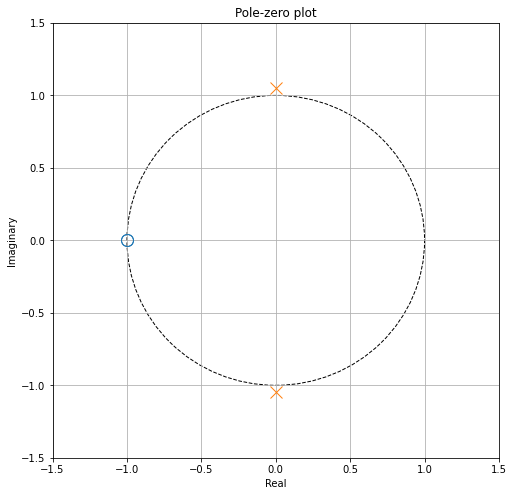

In [14]:
zplane(b,a1)

### Corresponding imuplse response $h_1[n]$ grows exponetially with $n$

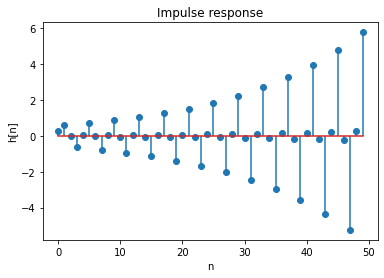

In [15]:
impz(b, a1, 50)

### Compute new output with the new transfer function $H_1(z)$

In [16]:
y1 = signal.lfilter(b, a1, x)

<StemContainer object of 3 artists>

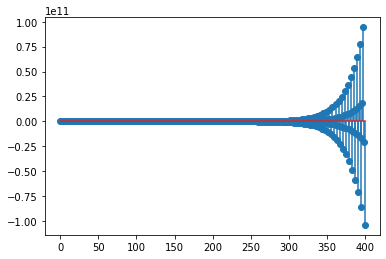

In [17]:
plt.stem(y1[:400]) # New output signal grows unbounded!!!

In [18]:
Audio(data=y1, rate=fs)

In [19]:
Audio(data=y, rate=fs)